# Novel Corona Virus analysis


Today we are very well familiar with the corona virus disease(COVID-19), being proving itself as a deadly epidemic for the 21st century. COVID-19 is getting worst each and everyday. Just because of the virus evolved from china, there is no one place left out of danger. People are being suffering with this sin. Approximately 7.8 lac of world's population has been infected by it till 30th March, thousands of them lost their life and much more are suffering.

**Here, we have the data from 22 January to 30th March.** The dataset is collected from [kaggle]('https://www.kaggle.com/datasets').


# Goal of the analysis
Here we are going to perform a simple exploratory data analysis of the Novel Corona Virus. With this analysis we want to convey the ruinious effect of Corona on the globe, alongwith the ratio with respect to different countries like US, China, Italy, Iran, Spain, Germany and much more. We will observe it's rate country by country.

This will help us to understand the overall growth of Corona virus.

Now, it's the time to read the data and get familiar with it.

## Reading data

In [1]:
# Importing related libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

%matplotlib inline

In [2]:
# Reading data
data = pd.read_csv('covid_19_30march.csv',index_col = 0)
data.index.name = None
cm = sns.light_palette("yellow", as_cmap=True)

head = data.head()

# Adding style
head = head.style.background_gradient(cmap=cm)

# Printing first five rows
head

In [3]:
tail = data.tail()

# Adding style
tail = tail.style.background_gradient(cmap=cm)

# Printing last five rows
tail

## Cleaning and manipulation

In [4]:
# Changing the columns name
data.columns = ['observed_date', 'state', 'country', 'last_update', 'confirmed', 'deaths', 'recovered']
data.head()

# Changing data types of some columns
data[['confirmed','deaths','recovered']] = data[['confirmed','deaths','recovered']].astype('int')
data['observed_date'] = data['observed_date'].str.replace('/','-')
data['observed_date'] = pd.to_datetime(data['observed_date'])

# Adding one more column 'active' for active cases
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']

# Replacing Mainland China to China
data['country'].replace({'Mainland China':'China'},inplace=True)
data['country'] = data['country'].str.strip()

data.head()

observed_date      state country      last_update  confirmed  deaths  \
1    2020-01-22      Anhui   China  1/22/2020 17:00          1       0   
2    2020-01-22    Beijing   China  1/22/2020 17:00         14       0   
3    2020-01-22  Chongqing   China  1/22/2020 17:00          6       0   
4    2020-01-22     Fujian   China  1/22/2020 17:00          1       0   
5    2020-01-22      Gansu   China  1/22/2020 17:00          0       0   

   recovered  active  
1          0       1  
2          0      14  
3          0       6  
4          0       1  
5          0       0

## Description of dataset

As there are total 8 columns in this dataset.
The description of columns in the corona dataset :-
- observed_date : Gives the date when the corona disease observed in that country
- state : Province or state which is infected
- country : Country or region 
- last_update : Date of last update
- confirmed : The total number of corona cases confirmed in that country
- deaths : Tells the number of people died in that country
- recovered : Number of people recovered from corona in that country
- active : Number of active cases

Now, we are very well familiar with each column in the dataset, it is pretty much simpler us to investigate further on the dataset.

In [5]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 1 to 10358
Data columns (total 8 columns):
observed_date    10358 non-null datetime64[ns]
state            5578 non-null object
country          10358 non-null object
last_update      10358 non-null object
confirmed        10358 non-null int64
deaths           10358 non-null int64
recovered        10358 non-null int64
active           10358 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 728.3+ KB


In [6]:
# Finding the starting, final dates and days
dates = pd.Series({'Starting date':data['observed_date'].min(),
                   'Final date':data['observed_date'].max()})
dates = pd.DataFrame(dates, columns=['Dates'])
dates

Dates
Starting date 2020-01-22
Final date    2020-03-30

The data we have is from 22nd jan to 30th mar that is total 68 days.

# Analysis of COVID-19
### Grouping data on the basis of date
This would help us the track the overall growth of Corona with respect to time.

In [7]:
# Setting option to print all rows without truncate
pd.set_option('max_rows',70)
grouped = data.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()
grouped_style = grouped.style.background_gradient(cmap=cm)
grouped_style

## Growth rate of Corona virus

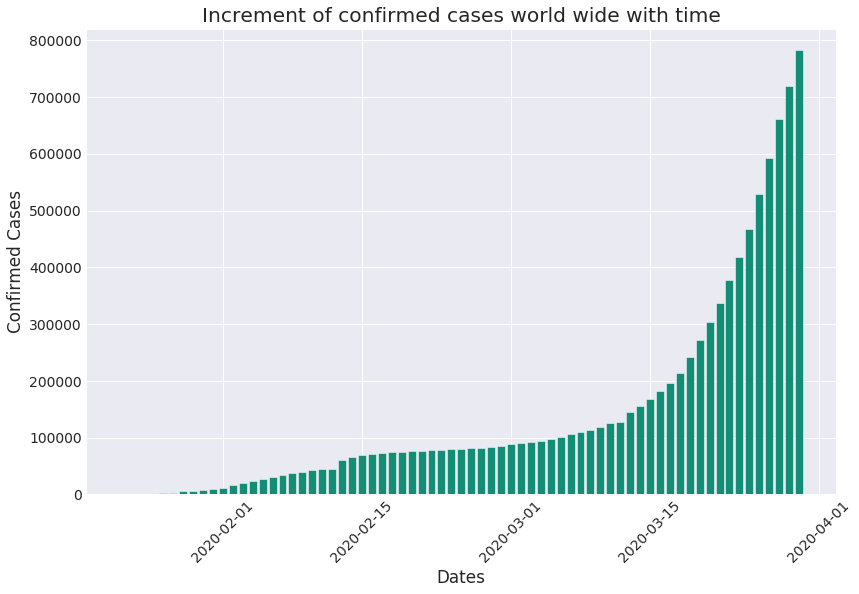

In [8]:
# Setting plot style
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.bar(grouped.index.values,
        grouped['confirmed'],
        color='#138D75')

# Set title and labels for axes
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.title('Increment of confirmed cases world wide with time')
plt.show()

With the help of graph we can conclude that the cases are increasing with exponential growth.

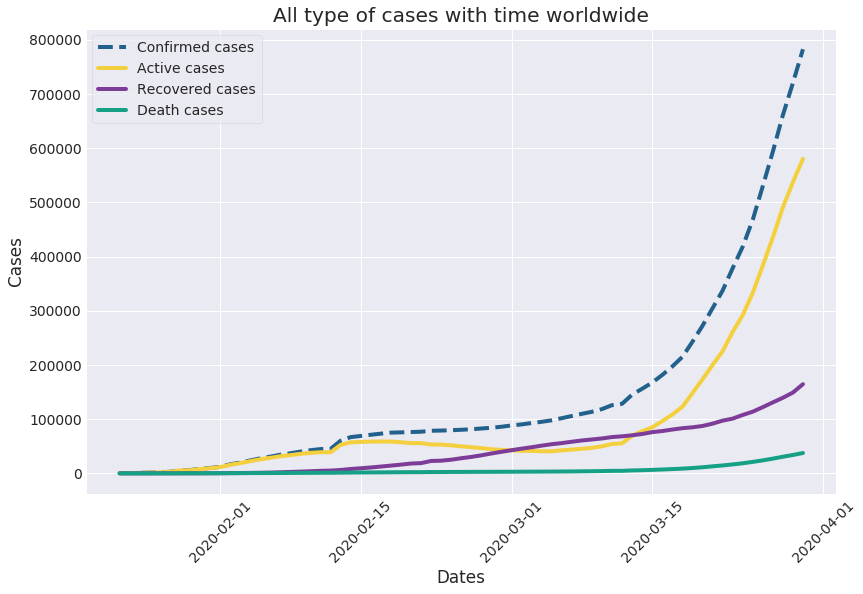

In [9]:
# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped.index.values, grouped['confirmed'], label='Confirmed cases',c='#21618C',linestyle='--')
plt.plot(grouped.index.values, grouped['active'], label='Active cases', c='#F4D03F')
plt.plot(grouped.index.values, grouped['recovered'], label='Recovered cases', c='#7D3C98')
plt.plot(grouped.index.values, grouped['deaths'], label='Death cases', c='#16A085')

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('All type of cases with time worldwide')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

## Total cases worldwide
We will look at total cases across worldwide till 30th March.


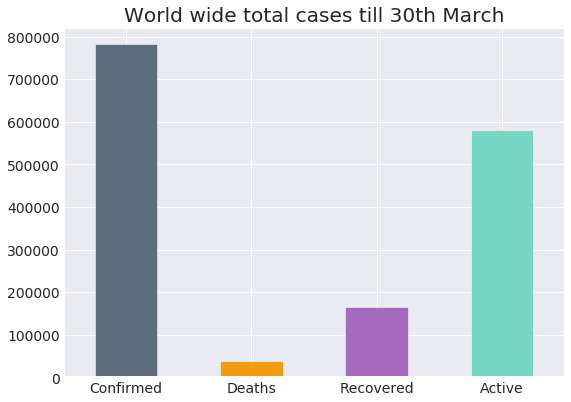

In [10]:
# Creating a series
graph = pd.Series({'Confirmed':grouped.confirmed.max(),
                   'Deaths':grouped.deaths.max(),
                   'Recovered':grouped.recovered.max(),
                   'Active':grouped.active.max()})

# Plotting a bar graph
graph.plot.bar(rot=0, title='World wide total cases till 30th March', figsize=(8,6), color=['#5D6D7E','#F39C12','#A569BD','#76D7C4'])


- Confirmed cases : Approx. 782,365
- Death cases     : Approx. 37,582
- Recovered cases : Approx. 164,566
- Active cases    : Approx. 580,217

The values may be vary to some instant.

## Total Countries infected

In [11]:
# Grouping data on the basis of countries
countries = data.groupby(['country'])
len(countries.groups)

212

Total 212 countries were infected by corona virus till 30th March.

## Total types of corona case world wide
We will discuss the total cases including :

- Confirmed cases
- Death cases
- Recovered cases
- Active cases

### 1. Confirmed cases world wide

In [12]:
# Setting option to show all rows
pd.set_option('max_rows',250)

# Grouping country for last date
last_date = data['observed_date'].max()
last_date_data = data[data['observed_date'] == last_date]
grouped_last_date_data = last_date_data.groupby('country')[['confirmed','deaths','recovered','active']].sum()

#country_confirmed =  pd.DataFrame(grouped_last_data['confirmed'].sum()
grouped_last_date_data = pd.DataFrame(grouped_last_date_data)
country_confirmed_cases =  grouped_last_date_data['confirmed'].sort_values(ascending=False)
df_confirmed = pd.DataFrame(country_confirmed_cases).style.background_gradient(cmap=cm)
df_confirmed

Text(0.5, 0, 'confirmed')

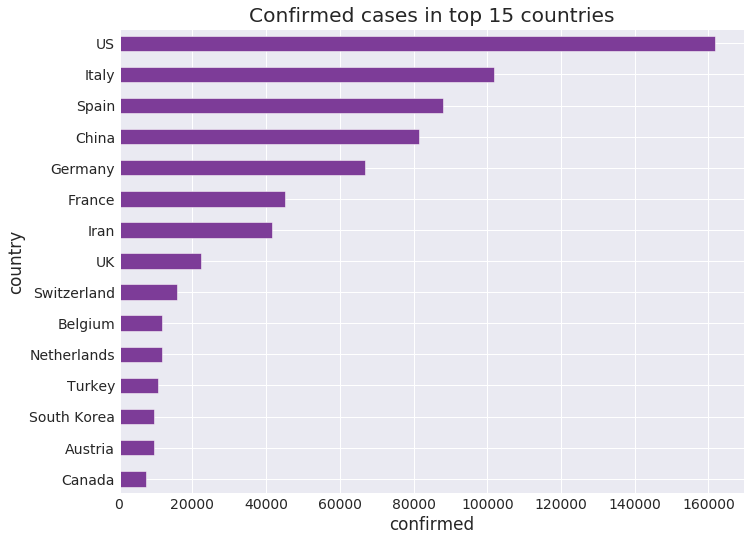

In [13]:
# Top 15 countries for confirmed cases
sns.set_style('darkgrid')
top_15_confirmed = country_confirmed_cases.sort_values(ascending=False).iloc[:15]
top_15_confirmed = top_15_confirmed.iloc[::-1]

# Plotting horizontal bar
top_15_confirmed.plot.barh(figsize=(10,8),legend=False,title='Confirmed cases in top 15 countries',color='#7D3C98')
plt.xlabel('confirmed')

### 2. Death cases world wide

In [14]:
# Total death cases by each country
country_deaths_cases = grouped_last_date_data['deaths'].sort_values(ascending=False)
df_deaths = pd.DataFrame(country_deaths_cases).style.background_gradient(cmap=cm)
df_deaths

Taking only 15 coutries to measure overall death cases.

Text(0.5, 0, 'deaths')

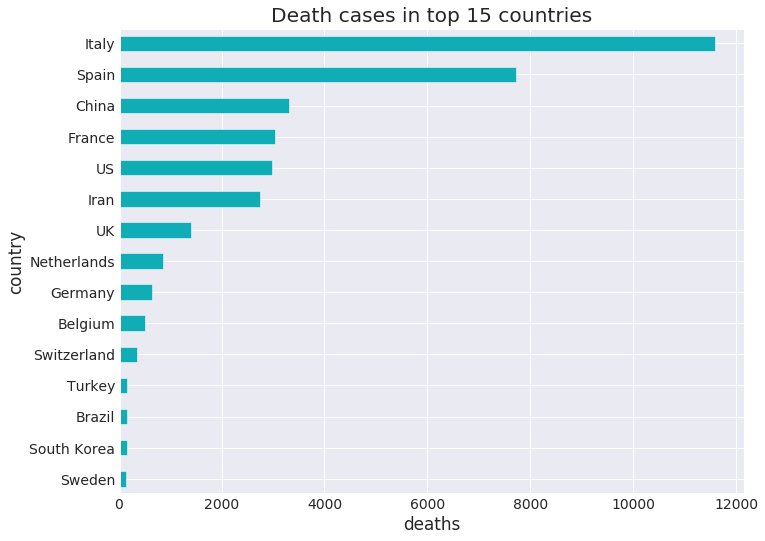

In [15]:
# Top 15 countries for death cases
top_15_death = country_deaths_cases.iloc[:15]
top_15_death = top_15_death.iloc[::-1]

# Plotting horizontal bar for death cases by countries
top_15_death.plot.barh(figsize=(10,8),title='Death cases in top 15 countries',color='#11ADB7',legend=False)
plt.xlabel('deaths')

### 3. Recovered cases world wide

In [16]:
# Total recovery cases by each country
country_recovered_cases = grouped_last_date_data['recovered'].sort_values(ascending=False)
df_recovered = pd.DataFrame(country_recovered_cases).style.background_gradient(cmap=cm)
df_recovered

Text(0.5, 0, 'Recovered')

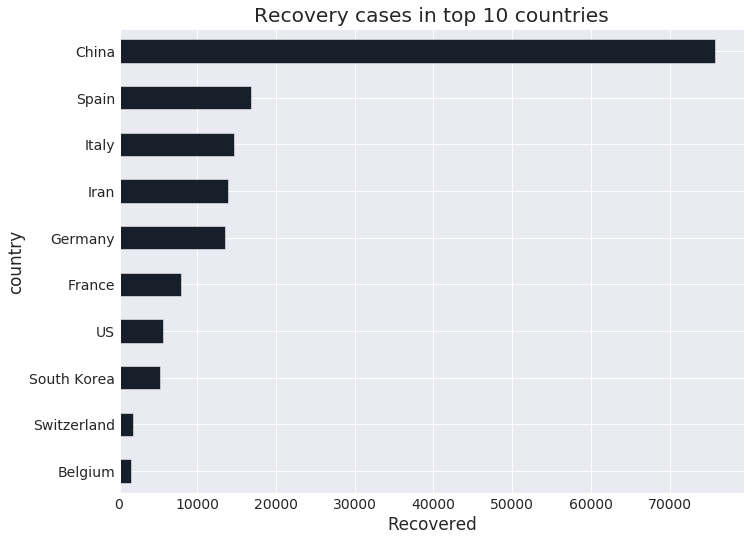

In [17]:
# Top 10 countries for recovery cases
top_10_recover = country_recovered_cases.iloc[:10]
top_10_recover = top_10_recover.iloc[::-1]

# Plotting horizontal bar graph
top_10_recover.plot.barh(figsize=(10,8),legend=False,title='Recovery cases in top 10 countries',color='#17202A')
plt.xlabel('Recovered')

### 4. Active case world wide

In [18]:
# Total active cases by each country
country_active_cases = grouped_last_date_data['active'].sort_values(ascending=False)
df_active = pd.DataFrame(country_active_cases).style.background_gradient(cmap=cm)
df_active

Text(0.5, 0, 'Active')

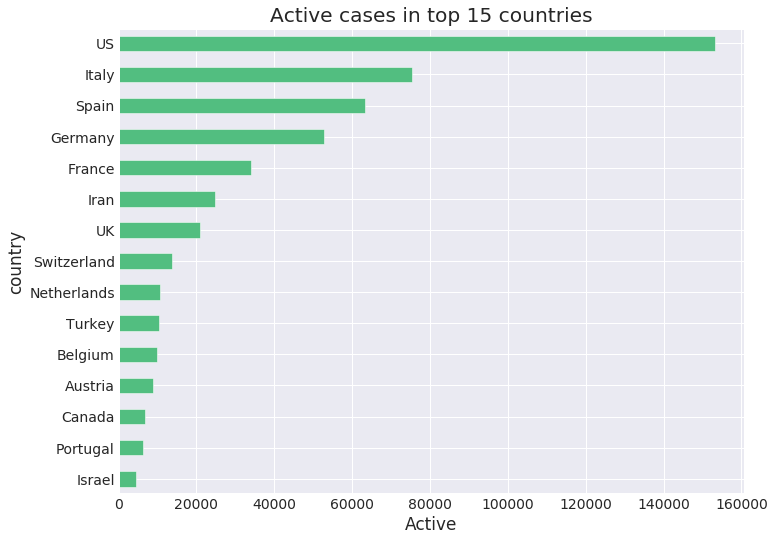

In [19]:
# Top 15 countries for active cases
top_15_active = country_active_cases.iloc[:15]
top_15_active = top_15_active.iloc[::-1]

# Plotting horizontal bar graph
top_15_active.plot.barh(figsize=(10,8),legend=False,title='Active cases in top 15 countries',color='#52BE80')
plt.xlabel('Active')

## Effect of Corona virus on various countries

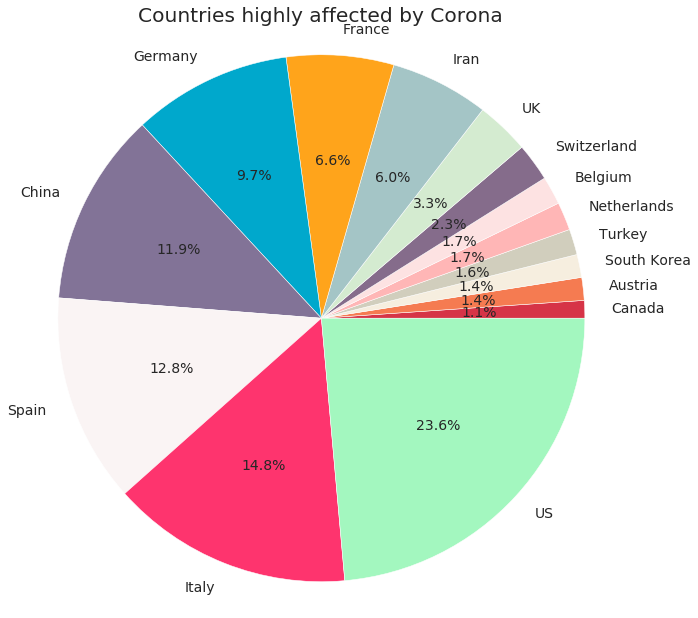

In [20]:
# Color codes
colors = ['#d63447','#f57b51','#f6eedf','#d1cebd','#ffb6b6','#fde2e2','#856c8b','#d4ebd0','#a4c5c6','#ffa41b','#00a8cc','#827397','#faf4f4','#fe346e','#a3f7bf']

fig = plt.figure(figsize=(10,10))
# Creating a pie chart
plt.pie(top_15_confirmed,labels=top_15_confirmed.index, colors=colors, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Countries highly affected by Corona')
plt.show()

## Growth rate of corona in countries
We will go through the countries which are highly affected by the corona virus.

### 1. China

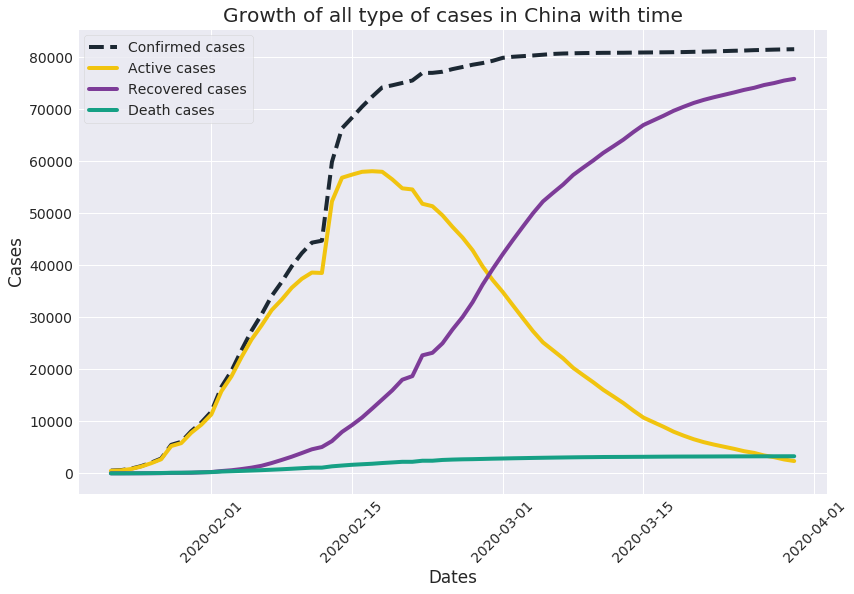

In [21]:
china = countries.get_group('China')
# Grouped China by observed date
grouped_china = china.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()

# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped_china.index.values, grouped_china['confirmed'], label='Confirmed cases',c='#1C2833',linestyle='--')
plt.plot(grouped_china.index.values, grouped_china['active'], label='Active cases', c='#F1C40F')
plt.plot(grouped_china.index.values, grouped_china['recovered'], label='Recovered cases', c='#7D3C98')
plt.plot(grouped_china.index.values, grouped_china['deaths'], label='Death cases', c='#16A085')

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('Growth of all type of cases in China with time')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

### 2. US

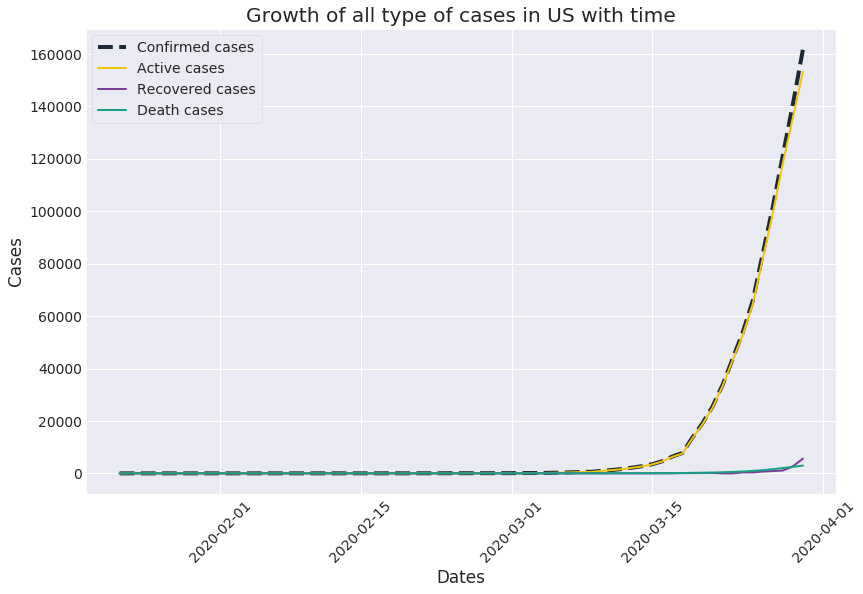

In [22]:
us = countries.get_group('US')
# Grouped China by observed date
grouped_us = us.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()

# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped_us.index.values, grouped_us['confirmed'], label='Confirmed cases',c='#1C2833',linestyle='--')
plt.plot(grouped_us.index.values, grouped_us['active'], label='Active cases', c='#F1C40F',linewidth=2)
plt.plot(grouped_us.index.values, grouped_us['recovered'], label='Recovered cases', c='#7D3C98',linewidth=2)
plt.plot(grouped_us.index.values, grouped_us['deaths'], label='Death cases', c='#16A085',linewidth=2)

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('Growth of all type of cases in US with time')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

### 3. Italy

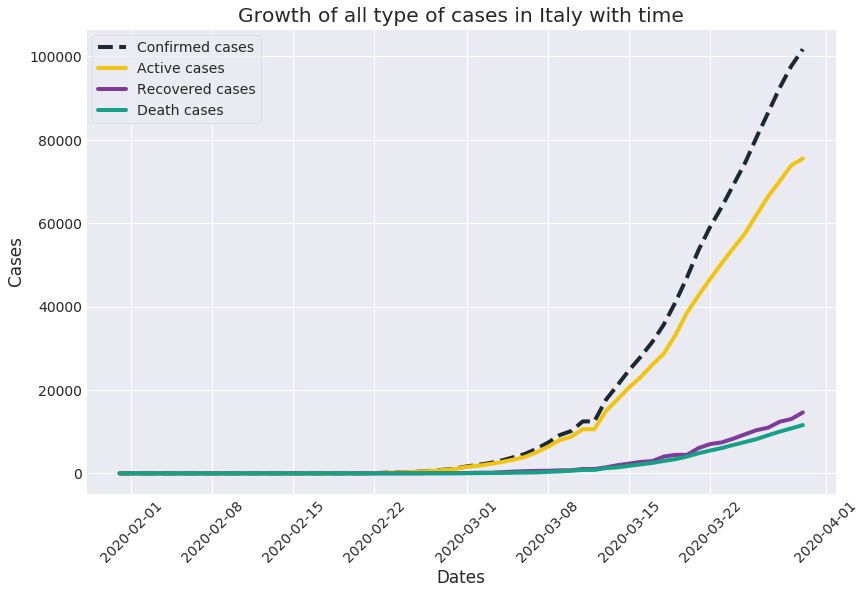

In [23]:
italy = countries.get_group('Italy')
# Grouped China by observed date
grouped_italy = italy.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()

# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped_italy.index.values, grouped_italy['confirmed'], label='Confirmed cases',c='#1C2833',linestyle='--')
plt.plot(grouped_italy.index.values, grouped_italy['active'], label='Active cases', c='#F1C40F')
plt.plot(grouped_italy.index.values, grouped_italy['recovered'], label='Recovered cases', c='#7D3C98')
plt.plot(grouped_italy.index.values, grouped_italy['deaths'], label='Death cases', c='#16A085')

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('Growth of all type of cases in Italy with time')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

### 4. Spain

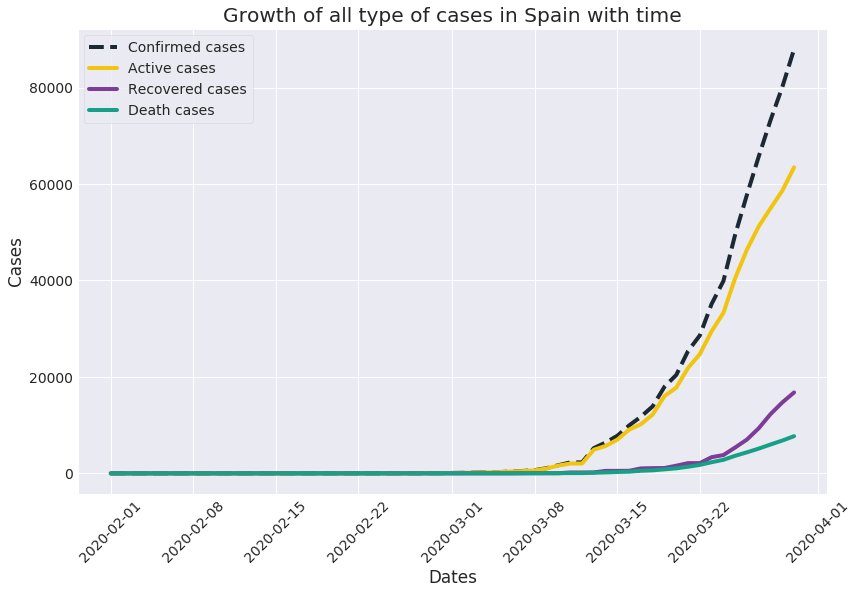

In [24]:
spain = countries.get_group('Spain')
# Grouped China by observed date
grouped_spain = spain.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()

# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped_spain.index.values, grouped_spain['confirmed'], label='Confirmed cases',c='#1C2833',linestyle='--')
plt.plot(grouped_spain.index.values, grouped_spain['active'], label='Active cases', c='#F1C40F')
plt.plot(grouped_spain.index.values, grouped_spain['recovered'], label='Recovered cases', c='#7D3C98')
plt.plot(grouped_spain.index.values, grouped_spain['deaths'], label='Death cases', c='#16A085')

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('Growth of all type of cases in Spain with time')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

### 5. Germany

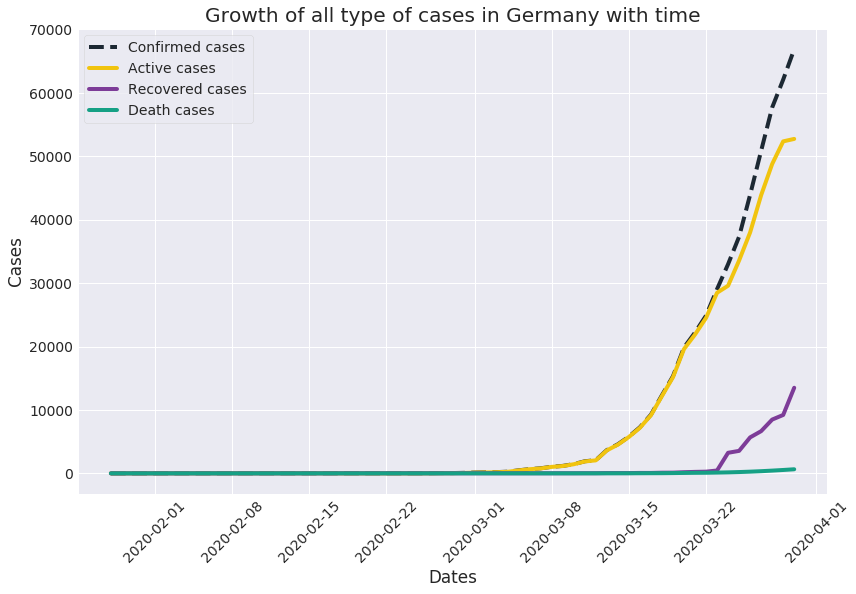

In [25]:
germany = countries.get_group('Germany')
# Grouped China by observed date
grouped_germany = germany.groupby('observed_date')[['confirmed','deaths','recovered','active']].sum()

# Creating figure
fig = plt.figure(figsize=(12,8))

# Plotting multiple lines in a single plot
plt.plot(grouped_germany.index.values, grouped_germany['confirmed'], label='Confirmed cases',c='#1C2833',linestyle='--')
plt.plot(grouped_germany.index.values, grouped_germany['active'], label='Active cases', c='#F1C40F')
plt.plot(grouped_germany.index.values, grouped_germany['recovered'], label='Recovered cases', c='#7D3C98')
plt.plot(grouped_germany.index.values, grouped_germany['deaths'], label='Death cases', c='#16A085')

# Specify legend location
plt.legend(loc='upper left')

# Rotation of x-axis ticks
plt.xticks(rotation=45)

# Labeling the plot
plt.title('Growth of all type of cases in Germany with time')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

###  Countries which were infected by corona but don't have any case now(at 30th March).

In [26]:
# Total confirmed cases of world
conf = countries['confirmed'].max()

# Total death cases of world
death = countries['deaths'].max()

# Total recovered cases of world
rec = countries['recovered'].max()

# Total active cases of world
cases_merge = pd.merge(left=conf, right=death,on='country')
cases_merge = pd.merge(left=cases_merge, right=rec, on='country')
cases_merge['active'] = cases_merge['confirmed'] - cases_merge['deaths'] - cases_merge['recovered']

# Finding which country has been affected but not now
zero_death_country = cases_merge[(cases_merge['confirmed']>0) & (cases_merge['active'] == 0)]
zero_death_country.index

Index(['Gibraltar', 'Saint Vincent and the Grenadines'], dtype='object', name='country')

There are only two countries which were affected by corona but don't have any death case till 30th March:
- **Gibraltar**
- **Saint Vincent and the Grenadines**

## Daily new cases

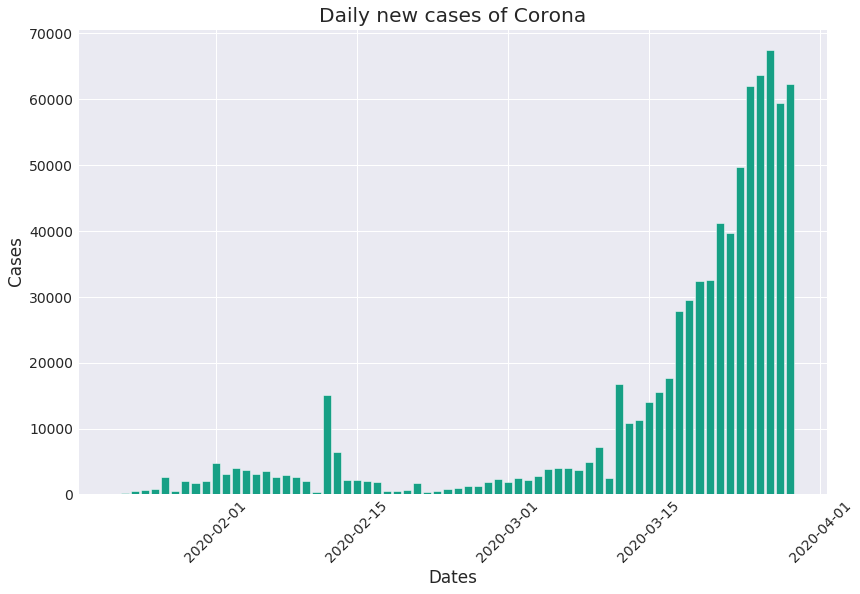

In [27]:
# Difference of each row to get daily cases
daily_confirm = grouped['confirmed'].diff(periods=1)

# Shifting the row
daily_confirm = daily_confirm.shift(periods=-1)

# Converting datatype of from float to int
daily_confirm = daily_confirm.dropna().astype('int')

daily_case = pd.DataFrame(daily_confirm, columns=['confirmed'])

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.bar(daily_case.index.values,
        daily_case['confirmed'],
        color='#16A085')

# Set title and labels for axes
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.title('Daily new cases of Corona')
plt.show()

There is a huge increment in the daily cases, which we can see with the help of given graph.

# Conclusion
With the analysis, we come to know that corona has created a worst condition of countries and ruining life of people all over the globe. Keeping in mind all this adverse effect we must be aware of it and try to make practice to stay away from it by creating a social distance.
This was the small analysis of COVID-19, hope this would help other to understand the critical situation of today.